# Modele Markov ascunse

Un profesor dă teste care pot fi dificile, medii sau ușoare. Probabilitatea dificultății primului test este aceeași. Dacă, la un moment dat, dă un test dificil, următorul test poate fi doar mediu sau ușor, cu aceeași probabilitate. Însa dacă dă un test mediu sau ușor, atunci următorul test va fi dificil cu probabilitate 0.5, sau mediu sau ușor cu aceeași probabilitate 0.25.

Nota unui student la test, FB, B, S sau NS depinde de dificultatea testului. Astfel, probabilitățile condiționate ale notei obținute, dată fiind dificultatea testului, sunt:

- **Test dificil:** [0.1, 0.2, 0.4, 0.3]
- **Test mediu:** [0.15, 0.25, 0.5, 0.1]
- **Test ușor:** [0.2, 0.3, 0.4, 0.1]

a) Utilizați librăria hmmlearn pentru a defini modelul Markov ascuns și desenati diagrama de stare.

b) Să presupunem că ați observat următoarea secvență de note: FB, FB, S, B, B, S, B, B, NS, B, B, S. Determinați cea mai probabilă secvență de dificultăți pentru testele corespunzătoare și probabilitatea acesteia.


Secvența optimă de dificultăți: ['mediu', 'dificil', 'usor', 'dificil', 'mediu', 'usor', 'dificil', 'mediu', 'usor', 'dificil', 'mediu', 'usor']
Probabilitatea asociată secvenței: 0.000000000027142096552569897955


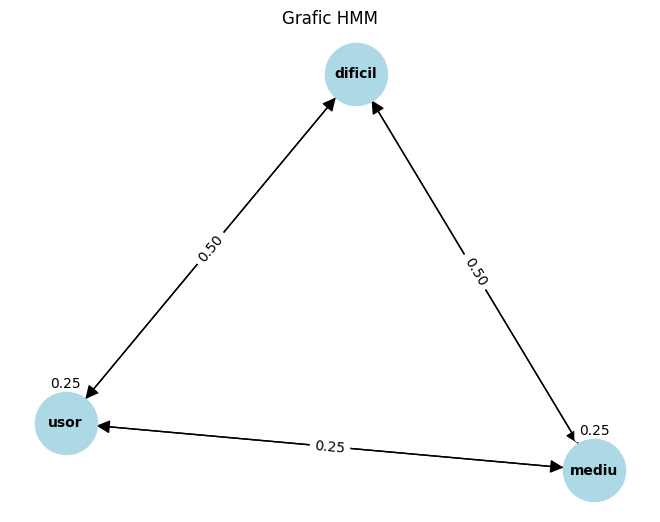

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

# Definirea stărilor și a observațiilor posibile
state_names = ["dificil", "mediu", "usor"]
observation_labels = ["FB", "B", "S", "NS"]
num_states = len(state_names)

# Matricea de tranziție între stări
transition_probs = np.array([
    [0.0, 0.5, 0.5],   # Dificil -> [Medii, Usor]
    [0.5, 0.25, 0.25], # Mediu -> [Dificil, Mediu, Usor]
    [0.5, 0.25, 0.25]  # Usor -> [Dificil, Mediu, Usor]
])

# Matricea de emisie
emission_probs = np.array([
    [0.1, 0.2, 0.4, 0.3],  # Dificil: [FB, B, S, NS]
    [0.15, 0.25, 0.5, 0.1], # Mediu: [FB, B, S, NS]
    [0.2, 0.3, 0.4, 0.1]    # Usor: [FB, B, S, NS]
])

# Probabilitățile inițiale pentru fiecare stare
initial_probabilities = np.array([1/3, 1/3, 1/3])

# Secvența de observații
observed_sequence = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B", "S"]
observed_indices = [observation_labels.index(obs) for obs in observed_sequence]
observed_indices = np.array(observed_indices).reshape(-1, 1) 
# Configurarea modelului HMM Gaussian
means = np.array([[0], [1], [2], [3]])  # FB=0, B=1, S=2, NS=3
covariance_matrices = np.tile(np.identity(1), (num_states, 1, 1))  # Covarianțe

# Crearea modelului HMM
hmm_model = hmm.GaussianHMM(n_components=num_states, covariance_type="full")
hmm_model.startprob_ = initial_probabilities
hmm_model.transmat_ = transition_probs
hmm_model.means_ = means
hmm_model.covars_ = covariance_matrices

# Aplicarea algoritmului Viterbi
log_prob, state_sequence = hmm_model.decode(observed_indices, algorithm="viterbi")
most_probable_states = [state_names[state] for state in state_sequence]

print("Secvența optimă de dificultăți:", most_probable_states)
print("Probabilitatea asociată secvenței:", f"{np.exp(log_prob):.30f}")

# Funcția pentru a desena graful HMM
def draw_hmm_graph(state_names, transition_probs):
    graph = nx.DiGraph()
    for i, state in enumerate(state_names):
        graph.add_node(state)
    for i, state_from in enumerate(state_names):
        for j, state_to in enumerate(state_names):
            prob = transition_probs[i, j]
            if prob > 0:
                graph.add_edge(state_from, state_to, weight=prob, label=f"{prob:.2f}")

    layout = nx.spring_layout(graph)
    nx.draw(graph, layout, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, layout, edge_labels=edge_labels, font_size=10)
    plt.title("Grafic HMM")
    plt.show()

draw_hmm_graph(state_names, transition_probs)
